In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## An Exploration of UN data

##### In this project, you'll be doing some exploratory analysis on two country-level metrics, gross domestic product (GDP) per capita and overall life expectancy. After completing the guided practice section, you will have a chance to find some additional data and do some more exploring of your own.

### Guided Practice:


#### 1. Download the Gross Domestic Product (GDP) per capita dataset from http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD. Rename it to gdp_per_capita.csv and place it in the data folder of your project repository.

#### 2. Create a Jupyter Notebook in the notebooks folder and name it UN_Data_Exploration.
###### 
You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it
###### .
Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from 'Code' to 'Markdown'. Here is a link to a cheat sheet showing the basics of styling text using Markdown.wn.

#### 3. In the first cell of your notebook, import the required packages with their customary aliases as at the very top of this notebook. ^^^^

#### 4. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df. After reading it in, inspect the first 10 rows and then inspect the last 10 rows.

In [9]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

In [10]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
5,Afghanistan,2018,2902.392113,NaN
6,Afghanistan,2017,2952.998916,NaN
7,Afghanistan,2016,2958.785399,NaN
8,Afghanistan,2015,2967.692067,NaN
9,Afghanistan,2014,3017.942544,NaN


In [11]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
8209,Zimbabwe,1999,4238.195198,NaN
8210,Zimbabwe,1998,4342.858177,NaN
8211,Zimbabwe,1997,4304.406272,NaN
8212,Zimbabwe,1996,4271.479930,NaN
8213,Zimbabwe,1995,3935.280057,NaN
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


#### 5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [13]:
gdp_drop_footnotes = gdp_df.drop('Value Footnotes', axis=1).rename(columns={'Country or Area':'Country', 'Value': 'GDP_Per_Capita'})

#### 6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [15]:
gdp_drop_footnotes.shape

(8219, 3)

In [16]:
gdp_drop_footnotes.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

In [17]:
gdp_drop_footnotes['Country'].unique()

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', "CÃ´te d'Ivoire",
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Dem. Rep. Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excludin

In [18]:
gdp_drop_footnotes['Country'] = gdp_drop_footnotes['Country'].astype('string')

In [19]:
gdp_drop_footnotes.dtypes

Country           string[python]
Year                       int64
GDP_Per_Capita           float64
dtype: object

In [20]:
gdp_drop_footnotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         8219 non-null   string 
 1   Year            8219 non-null   int64  
 2   GDP_Per_Capita  8219 non-null   float64
dtypes: float64(1), int64(1), string(1)
memory usage: 192.8 KB


##### 7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?



In [22]:
gdp_drop_footnotes['Year'].value_counts()

Year
2021    247
2020    247
2019    247
2018    247
2017    247
2016    247
2015    247
2014    247
2013    247
2012    246
2022    246
2011    246
2010    245
2009    245
2008    244
2007    242
2006    242
2005    241
2004    241
2003    241
2002    241
2000    240
2023    240
2001    240
1999    238
1998    238
1997    238
1996    236
1995    236
1994    235
1993    234
1992    234
1991    234
1990    233
Name: count, dtype: int64

In [23]:
hmm = gdp_drop_footnotes.groupby('Country')['GDP_Per_Capita'].count().sort_values()

In [24]:
hmm[hmm < 34]

Country
Djibouti                     11
Turks and Caicos Islands     13
Sint Maarten (Dutch part)    15
Faroe Islands                16
Kosovo                       16
Cayman Islands               18
Virgin Islands               21
CuraÃ§ao                     24
Afghanistan                  24
San Marino                   26
Montenegro                   27
Serbia                       29
West Bank and Gaza           30
Greenland                    32
Syrian Arab Republic         33
Somalia                      33
Tonga                        33
Bhutan                       33
Lebanon                      33
Name: GDP_Per_Capita, dtype: int64

In [25]:
hmm.nsmallest(n=10, keep='all')

Country
Djibouti                     11
Turks and Caicos Islands     13
Sint Maarten (Dutch part)    15
Faroe Islands                16
Kosovo                       16
Cayman Islands               18
Virgin Islands               21
CuraÃ§ao                     24
Afghanistan                  24
San Marino                   26
Name: GDP_Per_Capita, dtype: int64

###### I notice that the further in the past the date is the fewer instances of that year are located in the Year column. 

#### 8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [28]:
gdp_drop_footnotes['Country'].unique(

) 

<StringArray>
[                'Afghanistan', 'Africa Eastern and Southern',
  'Africa Western and Central',                     'Albania',
                     'Algeria',                     'Andorra',
                      'Angola',         'Antigua and Barbuda',
                  'Arab World',                   'Argentina',
 ...
         'Upper middle income',                     'Uruguay',
                  'Uzbekistan',                     'Vanuatu',
                    'Viet Nam',              'Virgin Islands',
          'West Bank and Gaza',                       'World',
                      'Zambia',                    'Zimbabwe']
Length: 247, dtype: string

In [29]:
gdp_drop_footnotes['Country'].nunique()

247

In [30]:
gdp_drop_footnotes['Country'].value_counts().tail(20)

Country
Tunisia                      34
Somalia                      33
Lebanon                      33
Tonga                        33
Syrian Arab Republic         33
Bhutan                       33
Greenland                    32
West Bank and Gaza           30
Serbia                       29
Montenegro                   27
San Marino                   26
CuraÃ§ao                     24
Afghanistan                  24
Virgin Islands               21
Cayman Islands               18
Faroe Islands                16
Kosovo                       16
Sint Maarten (Dutch part)    15
Turks and Caicos Islands     13
Djibouti                     11
Name: count, dtype: Int64

In [31]:
gdp_drop_footnotes['Country'].value_counts().head(20)

Country
Latvia                        34
East Asia & Pacific           34
Burundi                       34
Bulgaria                      34
Ecuador                       34
Brunei                        34
Africa Western and Central    34
Albania                       34
Algeria                       34
Andorra                       34
Angola                        34
Antigua and Barbuda           34
Arab World                    34
Argentina                     34
Armenia                       34
Aruba                         34
Australia                     34
Austria                       34
Azerbaijan                    34
Bahrain                       34
Name: count, dtype: Int64

###### Perhaps due to these countries being more newly formed, or not having the resources to collect the necessary data, or something of that nature. 

#### 9. Create a new dataframe by subsetting gdp_df to just the year 2021. Call this new dataframe gdp_2021.

In [34]:
gdp_2021 = gdp_drop_footnotes[gdp_drop_footnotes['Year'] == 2021]

In [35]:
gdp_2021.head(5)

,Country,Year,GDP_Per_Capita
2,Afghanistan,2021,2144.166570
26,Africa Eastern and Southern,2021,3934.287267
60,Africa Western and Central,2021,4698.926894
94,Albania,2021,16113.136519
128,Algeria,2021,14496.865470


#### 10. Use .describe() to find the summary statistics for GDP per capita in 2021.

In [37]:
gdp_2021['GDP_Per_Capita'].describe()

count       247.000000
mean      24478.517262
std       24601.525764
min         836.665571
25%        5996.532844
50%       15900.976581
75%       37298.776853
max      135379.291201
Name: GDP_Per_Capita, dtype: float64

#### 11. Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

<Axes: >

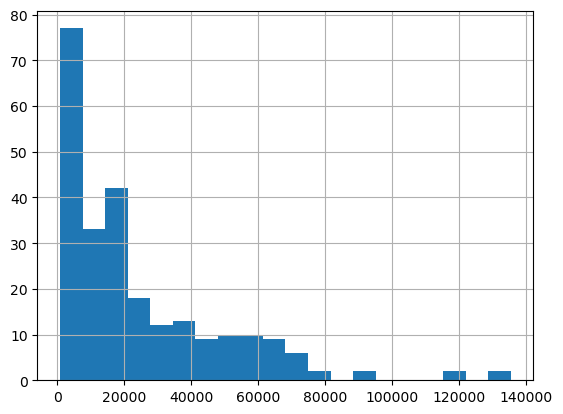

In [39]:
gdp_2021['GDP_Per_Capita'].hist(bins = 20)

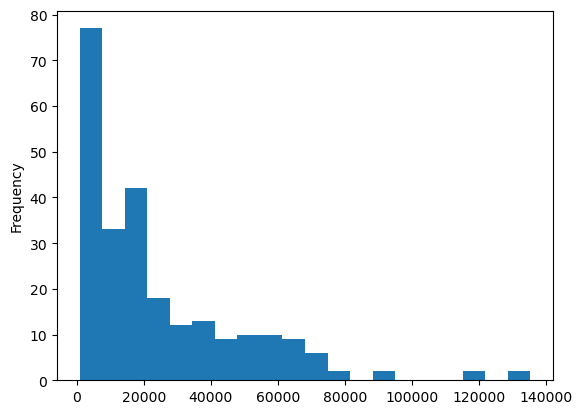

In [40]:
gdp_2021['GDP_Per_Capita'].plot(kind='hist', bins = 20);

In [41]:
gdp_2021['GDP_Per_Capita'].max()

135379.29120102368

#### 12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2021.']

In [43]:
gdp_2021.sort_values('GDP_Per_Capita', ascending=False) # a way to view both top and bottom 5 countries at the same time

,Country,Year,GDP_Per_Capita
4425,Luxembourg,2021,135379.291201
6513,Singapore,2021,131864.092336
3492,Ireland,2021,118594.746862
6118,Qatar,2021,116832.570290
740,Bermuda,2021,92276.234605
...,...,...,...
5132,Mozambique,2021,1457.235409
6698,Somalia,2021,1392.464262
1733,Dem. Rep. Congo,2021,1313.618218
1301,Central African Republic,2021,1128.552380


In [44]:
gdp_2021.nsmallest(5, "GDP_Per_Capita", keep='all')

,Country,Year,GDP_Per_Capita
1045,Burundi,2021,836.665571
1301,Central African Republic,2021,1128.552380
1733,Dem. Rep. Congo,2021,1313.618218
6698,Somalia,2021,1392.464262
5132,Mozambique,2021,1457.235409


In [45]:
gdp_2021.nlargest(5, 'GDP_Per_Capita') # a way to view the top 5 countries only

,Country,Year,GDP_Per_Capita
4425,Luxembourg,2021,135379.291201
6513,Singapore,2021,131864.092336
3492,Ireland,2021,118594.746862
6118,Qatar,2021,116832.570290
740,Bermuda,2021,92276.234605


In [46]:
gdp_2021.nsmallest(5, 'GDP_Per_Capita') # a way to view the bottom 5 countries only

,Country,Year,GDP_Per_Capita
1045,Burundi,2021,836.665571
1301,Central African Republic,2021,1128.552380
1733,Dem. Rep. Congo,2021,1313.618218
6698,Somalia,2021,1392.464262
5132,Mozambique,2021,1457.235409


#### 13. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2021 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named gdp_pivoted.

In [48]:
gdp_drop_footnotes.loc[(gdp_drop_footnotes['Year']==1990) | (gdp_drop_footnotes['Year']==2021)]

,Country,Year,GDP_Per_Capita
2,Afghanistan,2021,2144.166570
26,Africa Eastern and Southern,2021,3934.287267
57,Africa Eastern and Southern,1990,3386.854480
60,Africa Western and Central,2021,4698.926894
91,Africa Western and Central,1990,3299.401375
...,...,...,...
8150,World,1990,11207.386344
8153,Zambia,2021,3503.034914
8184,Zambia,1990,2425.111287
8187,Zimbabwe,2021,3184.785451


In [49]:
gdp_pivoted = pd.pivot_table(
    gdp_drop_footnotes.loc[(gdp_drop_footnotes['Year']==1990) | (gdp_drop_footnotes['Year']==2021)],
    values='GDP_Per_Capita',
    index='Country',
    columns='Year'
)

In [50]:
gdp_pivoted = (
    gdp_drop_footnotes
    [gdp_drop_footnotes["Year"].isin([1990, 2021])]
    .pivot_table(index="Country", columns="Year", values="GDP_Per_Capita")
    .dropna(subset = [1990, 2021])
)

In [51]:
gdp_pivoted

Year,1990,2021
Country,,
Africa Eastern and Southern,3386.854480,3934.287267
Africa Western and Central,3299.401375,4698.926894
Albania,5327.747458,16113.136519
Algeria,11728.545729,14496.865470
Andorra,50036.300776,59332.202910
...,...,...
Vanuatu,3101.680551,3135.836649
Viet Nam,2467.964601,12048.901994
World,11207.386344,19637.823230


In [52]:
#gdp_pivoted_what = gdp_pivoted[gdp_pivoted[1990].notna()]
#gdp_pivoted_what

In [53]:
gdp_pivoted = gdp_pivoted.reset_index()

In [54]:
gdp_pivoted

Year,Country,1990,2021
0,Africa Eastern and Southern,3386.854480,3934.287267
1,Africa Western and Central,3299.401375,4698.926894
2,Albania,5327.747458,16113.136519
3,Algeria,11728.545729,14496.865470
4,Andorra,50036.300776,59332.202910
...,...,...,...
228,Vanuatu,3101.680551,3135.836649
229,Viet Nam,2467.964601,12048.901994
230,World,11207.386344,19637.823230
231,Zambia,2425.111287,3503.034914


In [55]:
gdp_pivoted = gdp_pivoted.dropna(axis=0, ignore_index=True)
gdp_pivoted

Year,Country,1990,2021
0,Africa Eastern and Southern,3386.854480,3934.287267
1,Africa Western and Central,3299.401375,4698.926894
2,Albania,5327.747458,16113.136519
3,Algeria,11728.545729,14496.865470
4,Andorra,50036.300776,59332.202910
...,...,...,...
228,Vanuatu,3101.680551,3135.836649
229,Viet Nam,2467.964601,12048.901994
230,World,11207.386344,19637.823230
231,Zambia,2425.111287,3503.034914


#### 14. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [57]:
gdp_pivoted[1990]

0       3386.854480
1       3299.401375
2       5327.747458
3      11728.545729
4      50036.300776
           ...     
228     3101.680551
229     2467.964601
230    11207.386344
231     2425.111287
232     4013.299059
Name: 1990, Length: 233, dtype: float64

In [58]:
gdp_pivoted['Percent_Change'] = (100*(gdp_pivoted[2021]-gdp_pivoted[1990]) / gdp_pivoted[1990])
gdp_pivoted.head()

Year,Country,1990,2021,Percent_Change
0,Africa Eastern and Southern,3386.854480,3934.287267,16.163458
1,Africa Western and Central,3299.401375,4698.926894,42.417559
2,Albania,5327.747458,16113.136519,202.438069
3,Algeria,11728.545729,14496.865470,23.603265
4,Andorra,50036.300776,59332.202910,18.578316


#### 15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?

In [60]:
gdp_pivoted[gdp_pivoted['Percent_Change'] < 0].shape[0]

23

In [61]:
#print(f'There are this many: {(gdp_pivoted['Percent_Change'] < 0).sum()} countries )

In [62]:
gdp_pivoted[gdp_pivoted['Percent_Change'].le(0)]

Year,Country,1990,2021,Percent_Change
16,Barbados,16976.761648,15683.884713,-7.615569
27,Brunei,118163.683198,78248.797110,-33.779318
30,Burundi,1396.077627,836.665571,-40.070269
36,Central African Republic,1481.252551,1128.552380,-23.810941
43,Congo,8699.526839,6263.211613,-28.005146
49,Dem. Rep. Congo,2172.001597,1313.618218,-39.520384
71,Fragile and conflict affected situations,6062.707946,5245.734664,-13.475386
73,Gabon,23884.810700,18523.579803,-22.446194
84,Haiti,3946.365646,3134.950149,-20.561083
111,Kyrgyz Republic,6095.681086,5736.478834,-5.892734


#### 16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2018. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare? 
Bonus: Put both line charts on the same plot.

In [64]:
gdp_pivoted['Percent_Change'].max()

1398.1460518348676

In [65]:
gdp_pivoted.nlargest(2, "Percent_Change")

Year,Country,1990,2021,Percent_Change
60,Equatorial Guinea,1122.817674,16821.448647,1398.146052
40,China,1645.578944,20406.729658,1140.094237


<Axes: xlabel='Year'>

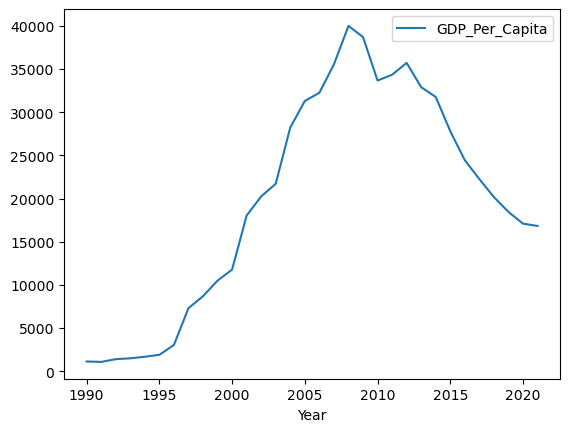

In [66]:
(
    gdp_drop_footnotes[gdp_drop_footnotes['Country'] == "Equatorial Guinea"]
    .loc[gdp_drop_footnotes["Year"] <= 2021]
    .loc[gdp_drop_footnotes["Year"] >= 1990]
    .plot(x="Year", y="GDP_Per_Capita", kind="line")
    
)

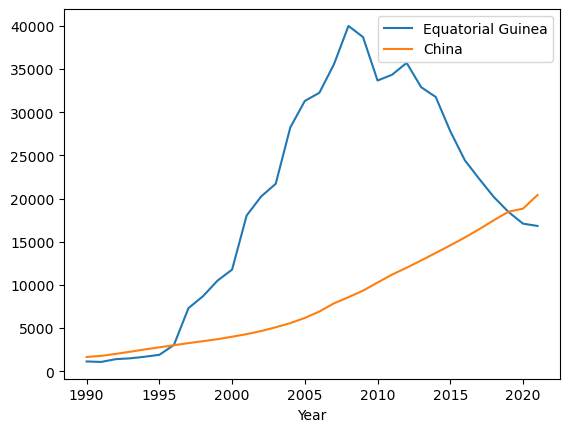

In [67]:
ax=(
gdp_drop_footnotes
.loc[gdp_drop_footnotes['Country'] == 'Equatorial Guinea']
.loc[gdp_drop_footnotes['Year'] <= 2021]
.loc[gdp_drop_footnotes['Year'] >= 1990]
.plot(x="Year", y="GDP_Per_Capita", kind="line", label = 'Equatorial Guinea')
)
(
gdp_drop_footnotes
.loc[gdp_drop_footnotes['Country'] == 'China']
.loc[gdp_drop_footnotes['Year'] <= 2021]
.loc[gdp_drop_footnotes['Year'] >= 1990]
.plot(x="Year", y="GDP_Per_Capita", kind="line", label = 'China', ax=ax)
);

In [68]:
#sns.lineplot(
#    data = two_max_gdp_change, 
#    x = 'Year', 
#    y = 'GDP_Per_Capita', 
#    hue = 'Country')
#plt.title('China and Equatorial Guinea GDP Per Capita Growth')
#plt.ylabel('GDP Per Capita');

In [69]:
#ax=China_GDP_data.plot(x='Year',y='GDP_Per_Capita',kind='line',label='China')
#EG_GDP_data.plot(x='Year',y='GDP_Per_Capita',kind='line', label='Equatorial Guinea', ax=ax)

In [70]:
#gdp_pivoted.loc[gdp_pivoted['Percent_Change'].idxmax()]#, ['Percent_Change', 'Country']]

In [71]:
gdp_drop_footnotes[gdp_drop_footnotes['Country'] == 'Equatorial Guinea']

,Country,Year,GDP_Per_Capita
2116,Equatorial Guinea,2023,15688.238419
2117,Equatorial Guinea,2022,16932.770683
2118,Equatorial Guinea,2021,16821.448647
2119,Equatorial Guinea,2020,17089.153726
2120,Equatorial Guinea,2019,18446.591658
2121,Equatorial Guinea,2018,20165.479555
2122,Equatorial Guinea,2017,22250.438923
2123,Equatorial Guinea,2016,24435.064556
2124,Equatorial Guinea,2015,27797.794280
2125,Equatorial Guinea,2014,31765.899706


In [72]:
#gdp_drop_footnotes[gdp_drop_footnotes['Country'] == gdp_drop_footnotes['Country'].value_counts().idxmax()]

In [73]:
gdp_drop_footnotes

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


#### 17. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [75]:
continents = pd.read_csv("../data/continents.csv")

In [76]:
continents

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola
...,...,...
211,Asia,Vietnam
212,Asia,West Bank and Gaza
213,Asia,Yemen
214,Africa,Zambia


#### 18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.



In [78]:
#gdp_df

In [79]:
gdp_df = pd.merge(
    left = gdp_drop_footnotes, 
    right = continents, 
    left_on = 'Country', 
    right_on = 'Country',
    validate = "many_to_one",
    how = 'outer',
    indicator = True
)
gdp_df.head(2)

,Country,Year,GDP_Per_Capita,Continent,_merge
0,Afghanistan,2023.0,1992.424394,Asia,both
1,Afghanistan,2022.0,1981.710168,Asia,both


#### 19. Determine the number of countries per continent. Create a bar chart showing this.

In [81]:
gdp_df['Continent'].value_counts()

Continent
Africa           1682
Europe           1499
Asia             1386
North America     875
Oceania           475
South America     375
Name: count, dtype: int64

In [82]:
gdp_df['Continent'].value_counts(normalize=True)

Continent
Africa           0.267324
Europe           0.238239
Asia             0.220280
North America    0.139065
Oceania          0.075493
South America    0.059599
Name: proportion, dtype: float64

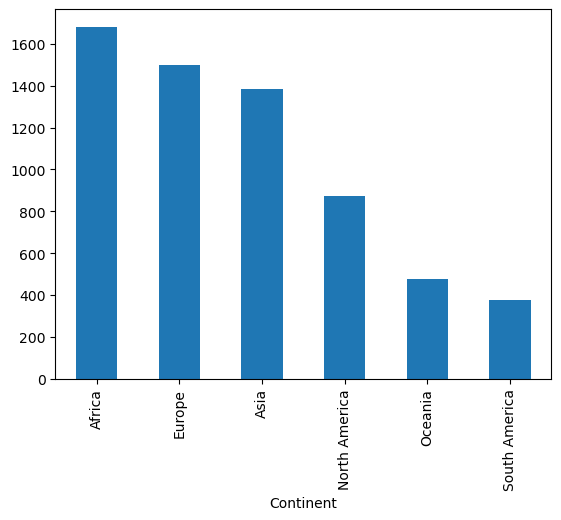

In [83]:
(
    gdp_df
    ['Continent']
    .value_counts()
    .plot(kind="bar")
);

#### 20. Create a seaborn boxplot showing GDP per capita in 2021 split out by continent. What do you notice?



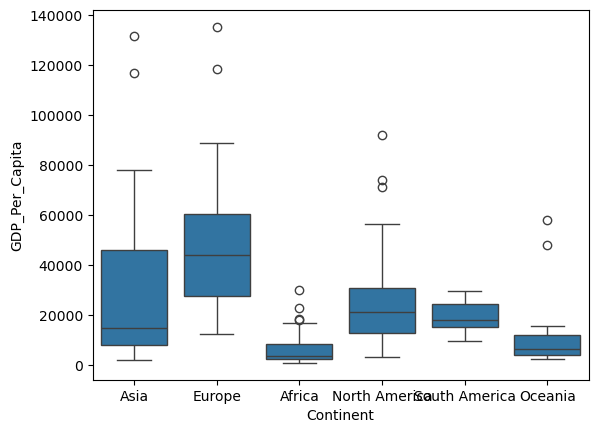

In [85]:
sns.boxplot(data=gdp_df[gdp_df['Year'] == 2021], y="GDP_Per_Capita", x="Continent");

##### Europe and Asia have the higher levels of GDP overall. Though Asia has a high right skew. 

#### 21. Download the full csv containing Life expectancy at birth, total (years) from https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false. Read this data into a DataFrame named life_expectancy. Note: When reading this dataset it, you may encounter an error. Modify your read_csv call to correct this without modifying the original csv file.

In [88]:
life_expectancy = pd.read_csv("../data/life_expectancy.csv", skiprows=4)
life_expectancy.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.049000,64.215000,64.60200,64.944000,65.303000,65.615000,...,75.540000,75.620000,75.880000,76.019000,75.406000,73.655000,76.22600,76.353000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.169658,44.468838,44.87789,45.160583,45.535695,45.770723,...,62.167981,62.591275,63.330691,63.857261,63.766484,62.979999,64.48702,65.146291,NaN,NaN


#### 22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use .melt() to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to Country, Year, and Life_Expectancy.

In [90]:
life_expectancy = life_expectancy.drop(["Country Code", "Indicator Name", "Indicator Code"], axis=1)
life_expectancy.head(2)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,64.049000,64.215000,64.60200,64.944000,65.303000,65.615000,66.126000,66.385000,66.744000,...,75.540000,75.620000,75.880000,76.019000,75.406000,73.655000,76.22600,76.353000,NaN,NaN
1,Africa Eastern and Southern,44.169658,44.468838,44.87789,45.160583,45.535695,45.770723,45.765725,46.440745,46.738632,...,62.167981,62.591275,63.330691,63.857261,63.766484,62.979999,64.48702,65.146291,NaN,NaN


In [91]:
life_expectancy_melt = pd.melt(life_expectancy, id_vars=[('Country Name')]).rename(columns={"Country Name": "Country", "variable": "Year", "value": "Life_Expectancy"})

In [92]:
life_expectancy_melt

,Country,Year,Life_Expectancy
0,Aruba,1960,64.049000
1,Africa Eastern and Southern,1960,44.169658
2,Afghanistan,1960,32.799000
3,Africa Western and Central,1960,37.779636
4,Angola,1960,37.933000
...,...,...,...
17551,Kosovo,Unnamed: 69,NaN
17552,"Yemen, Rep.",Unnamed: 69,NaN
17553,South Africa,Unnamed: 69,NaN
17554,Zambia,Unnamed: 69,NaN


#### 23. What was the first country with a life expectancy to exceed 80?

In [94]:
life_expectancy_melt.loc[life_expectancy_melt["Life_Expectancy"] >= 80]#, :

,Country,Year,Life_Expectancy
8661,Monaco,1992,80.065000
8784,Andorra,1993,80.186000
8927,Monaco,1993,80.365000
9050,Andorra,1994,80.587000
9193,Monaco,1994,80.654000
...,...,...,...
16966,Singapore,2023,82.895122
16970,San Marino,2023,85.706000
16980,Slovenia,2023,81.978049
16981,Sweden,2023,83.309756


#### 24. Merge gdp_df and life_expectancy, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named gdp_le. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [96]:
life_expectancy_melt.head()

,Country,Year,Life_Expectancy
0,Aruba,1960,64.049000
1,Africa Eastern and Southern,1960,44.169658
2,Afghanistan,1960,32.799000
3,Africa Western and Central,1960,37.779636
4,Angola,1960,37.933000


In [97]:
life_expectancy_melt.dropna()

,Country,Year,Life_Expectancy
0,Aruba,1960,64.049000
1,Africa Eastern and Southern,1960,44.169658
2,Afghanistan,1960,32.799000
3,Africa Western and Central,1960,37.779636
4,Angola,1960,37.933000
...,...,...,...
17019,Kosovo,2023,78.033000
17020,"Yemen, Rep.",2023,69.295000
17021,South Africa,2023,66.139000
17022,Zambia,2023,66.349000


In [98]:
life_expectancy_melt.dtypes

Country             object
Year                object
Life_Expectancy    float64
dtype: object

In [99]:
#life_expectancy_melt = life_expectancy_melt.dropna().astype({"Year": int})
#life_expectancy_melt.head(2)

In [100]:
life_expectancy_melt["Year"] = pd.to_numeric(life_expectancy_melt["Year"], errors="coerce")

In [101]:
life_expectancy_melt.tail(2)

,Country,Year,Life_Expectancy
17554,Zambia,NaN,NaN
17555,Zimbabwe,NaN,NaN


In [102]:
gdp_df.head(2)

,Country,Year,GDP_Per_Capita,Continent,_merge
0,Afghanistan,2023.0,1992.424394,Asia,both
1,Afghanistan,2022.0,1981.710168,Asia,both


In [103]:
gdp_df.dtypes

Country             object
Year               float64
GDP_Per_Capita     float64
Continent           object
_merge            category
dtype: object

In [104]:
gdp_df.tail(2)

,Country,Year,GDP_Per_Capita,Continent,_merge
8246,Zimbabwe,1991.0,4126.405247,Africa,both
8247,Zimbabwe,1990.0,4013.299059,Africa,both


In [105]:
gdp_df["Year"] = pd.to_numeric(gdp_df["Year"], errors="coerce")

In [106]:
gdp_df

,Country,Year,GDP_Per_Capita,Continent,_merge
0,Afghanistan,2023.0,1992.424394,Asia,both
1,Afghanistan,2022.0,1981.710168,Asia,both
2,Afghanistan,2021.0,2144.166570,Asia,both
3,Afghanistan,2020.0,2769.685745,Asia,both
4,Afghanistan,2019.0,2927.245144,Asia,both
...,...,...,...,...,...
8243,Zimbabwe,1994.0,3965.730986,Africa,both
8244,Zimbabwe,1993.0,3634.750494,Africa,both
8245,Zimbabwe,1992.0,3649.891947,Africa,both
8246,Zimbabwe,1991.0,4126.405247,Africa,both


In [107]:
#gdp_df = gdp_df.dropna().astype({"Year": int})
#gdp_df.head()

In [108]:
gdp_le = pd.merge(
    left=life_expectancy_melt,
    right=gdp_df,
    left_on=["Country", "Year"],
    right_on=["Country", "Year"],
    how="inner",
    validate="many_to_one"
)

In [109]:
gdp_le

,Country,Year,Life_Expectancy,GDP_Per_Capita,Continent,_merge
0,Aruba,1990.0,72.546000,34579.220640,North America,both
1,Africa Eastern and Southern,1990.0,51.096326,3386.854480,NaN,left_only
2,Africa Western and Central,1990.0,48.459295,3299.401375,NaN,left_only
3,Angola,1990.0,41.854000,7391.752354,Africa,both
4,Albania,1990.0,72.710000,5327.747458,Europe,both
...,...,...,...,...,...,...
7429,Liechtenstein,NaN,NaN,NaN,Europe,right_only
7430,Monaco,NaN,NaN,NaN,Europe,right_only
7431,Russian Federation,NaN,NaN,NaN,Europe,right_only
7432,South Sudan,NaN,NaN,NaN,Africa,right_only


#### 25. Create a new DataFrame, named gdp_le_2021 by extracting data for the year 2021 from gdp_le. How many countries have a life expectancy of at least 80 in 2021?

In [111]:
gdp_le_2021 = gdp_le[gdp_le["Year"]==2021]

In [112]:
gdp_le_2021[gdp_le_2021["Life_Expectancy"]>= 80].count()#.iloc[0]

Country            36
Year               36
Life_Expectancy    36
GDP_Per_Capita     36
Continent          33
_merge             36
dtype: int64

#### 26. Find the countries that had the top 3 largest GDP per capita figures for 2021. Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.



In [114]:
#gdp_le_2021[gdp_le_2021["GDP_Per_Capita"].nlargest()]#.count()#.iloc[0]

In [228]:
try_three = gdp_le_2021.nlargest(3, "GDP_Per_Capita")
try_three

,Country,Year,Life_Expectancy,GDP_Per_Capita,Continent,_merge
6889,Luxembourg,2021.0,82.597561,135379.291201,Europe,both
6943,Singapore,2021.0,83.092683,131864.092336,Asia,both
6859,Ireland,2021.0,82.253659,118594.746862,Europe,both


In [242]:
#gdp_le[gdp_le["Country"] == ["Luxembourg", "Singapore"]]

In [220]:
#fg = sns.FacetGrid(df, col='B', col_wrap=4)
#fg.map(sns.scatterplot, 'A','C')
#fg.add_legend()

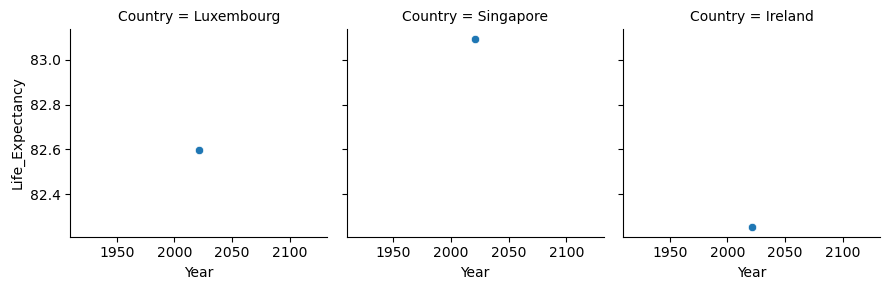

In [226]:
well = sns.FacetGrid(try_three, col="Country", col_wrap=3)
well.map(sns.scatterplot, 'Year', 'Life_Expectancy')